<a href="https://colab.research.google.com/github/RiniPaul86/Assignment/blob/main/DBScan_Clustering_Penguins_Species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clustering Penguins Species

In [1]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("/content/penguins.csv");
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
#round off to nearest integer value
df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']] = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].round(2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [5]:
df.duplicated().sum()

1

In [6]:
# Dropping duplicated rows from the DataFrame
df = df.drop_duplicates()

# Optionally, reset the index
df = df.reset_index(drop=True)

In [7]:
# For DataFrame, use
df.replace('.', 0, inplace=True)

In [8]:
df.isnull().sum()

,0
culmen_length_mm,1
culmen_depth_mm,1
flipper_length_mm,1
body_mass_g,1
sex,8


In [9]:
#dropping the colum with null values
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [11]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,335.000000,335.000000,335.000000,335.000000
mean,43.988358,17.169552,214.355224,4209.179104
std,5.453430,1.971966,263.253508,803.633495
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.550000,18.700000,213.000000,4787.500000
max,59.600000,21.500000,5000.000000,6300.000000


In [12]:
# Replacing with numerical values
df['sex'] = df['sex'].replace({'MALE': 0, 'FEMALE': 1})

In [13]:
array = df.values

In [14]:
array

array([[3.91e+01, 1.87e+01, 1.81e+02, 3.75e+03, 0.00e+00],
       [3.95e+01, 1.74e+01, 1.86e+02, 3.80e+03, 1.00e+00],
       [4.03e+01, 1.80e+01, 1.95e+02, 3.25e+03, 1.00e+00],
       ...,
       [5.04e+01, 1.57e+01, 2.22e+02, 5.75e+03, 0.00e+00],
       [4.52e+01, 1.48e+01, 2.12e+02, 5.20e+03, 1.00e+00],
       [4.99e+01, 1.61e+01, 2.13e+02, 5.40e+03, 0.00e+00]])

In [15]:
#Standarizing the array
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [16]:
X

array([[-0.89772327,  0.77726336, -0.12689335, -0.57223347, -0.98518437],
       [-0.82426521,  0.11703673, -0.10787184, -0.50992298,  1.01503844],
       [-0.67734909,  0.42175671, -0.07363312, -1.19533834,  1.01503844],
       ...,
       [ 1.17746691, -0.74633656,  0.02908304,  1.920186  , -0.98518437],
       [ 0.22251214, -1.20341653, -0.00895998,  1.23477065,  1.01503844],
       [ 1.08564434, -0.5431899 , -0.00515568,  1.4840126 , -0.98518437]])

In [17]:
#Grid searchcCV for hyperparameter turning of eps and min samples

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np



# Define the range for eps and min_samples
eps_range = np.arange(0.1, 1.1, 0.1)
min_samples_range = range(3, 11)

best_score = -1
best_params = {'eps': None, 'min_samples': None}

# Perform the grid search
for eps in eps_range:
    for min_samples in min_samples_range:
        # Initialize and fit the DBSCAN model
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)

        # Check if all points were labeled as noise
        if len(set(labels)) > 1:
            # Calculate the silhouette score
            score = silhouette_score(X, labels)

            # Update the best score and parameters if needed
            if score > best_score:
                best_score = score
                best_params['eps'] = eps
                best_params['min_samples'] = min_samples

print("Best Silhouette Score: ", best_score)
print("Best Parameters: ", best_params)

Best Silhouette Score:  0.5376837123301219
Best Parameters:  {'eps': 0.7000000000000001, 'min_samples': 3}


In [18]:
#Applying DBScan
dbscan = DBSCAN(eps=0.7, min_samples=3)
dbscan.fit(X)

#Noisy samples are given the label -1.
dbscan.labels_

array([ 0,  1,  1,  1,  0,  1,  0, -1,  1,  0, -1,  1,  1,  0,  1,  0,  1,
        0,  1,  0,  0,  1,  0,  1,  1,  0,  1,  0,  1,  0,  1,  0,  0,  1,
        1,  0,  1,  0,  1,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  1,  0,  1,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0, -1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  0,  1,  1,  0,  1,  0,  1,  2,  2,  1,  2,  1,
        1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  2, -1,  1,  2,  1,  2,  1,
        2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  2,  1,  1,  2, -1,  2,
        2,  1,  2,  1,  1,  2,  1,  2,  2,  1,  1,  2,  1,  2,  1,  2,  1,
        2,  2,  1,  2,  1,  1,  2,  1,  2,  2,  1,  3,  4,  3,  4,  4,  3,
        3,  4,  3,  4,  3

In [19]:
cl = pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [20]:
cl

,cluster
0,0
1,1
2,1
3,1
4,0
...,...
330,3
331,3
332,4
333,3


In [21]:
clustered = pd.concat([df,cl],axis=1)

In [22]:
clustered[clustered['cluster']==-1]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
7,39.2,19.6,195.0,4675.0,0.0,-1.0
109,43.2,19.0,197.0,4775.0,0.0,-1.0
164,47.0,17.3,185.0,3700.0,1.0,-1.0
185,51.0,18.8,203.0,4100.0,0.0,-1.0
247,47.8,15.0,215.0,5650.0,0.0,-1.0
251,42.8,14.2,209.0,4700.0,1.0,-1.0
10,NaN,NaN,NaN,NaN,NaN,-1.0


In [23]:
clustered

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,39.1,18.7,181.0,3750.0,0.0,0.0
1,39.5,17.4,186.0,3800.0,1.0,1.0
2,40.3,18.0,195.0,3250.0,1.0,1.0
4,36.7,19.3,193.0,3450.0,1.0,0.0
5,39.3,20.6,190.0,3650.0,0.0,1.0
...,...,...,...,...,...,...
11,NaN,NaN,NaN,NaN,NaN,1.0
47,NaN,NaN,NaN,NaN,NaN,1.0
246,NaN,NaN,NaN,NaN,NaN,3.0
286,NaN,NaN,NaN,NaN,NaN,3.0


In [24]:
clustered.mean()

,0
culmen_length_mm,43.988358
culmen_depth_mm,17.169552
flipper_length_mm,214.355224
body_mass_g,4209.179104
sex,0.492537
cluster,1.728358


In [25]:
print(cl['cluster'].value_counts())

cluster
 1    104
 0     72
 4     60
 3     58
 2     34
-1      7
Name: count, dtype: int64


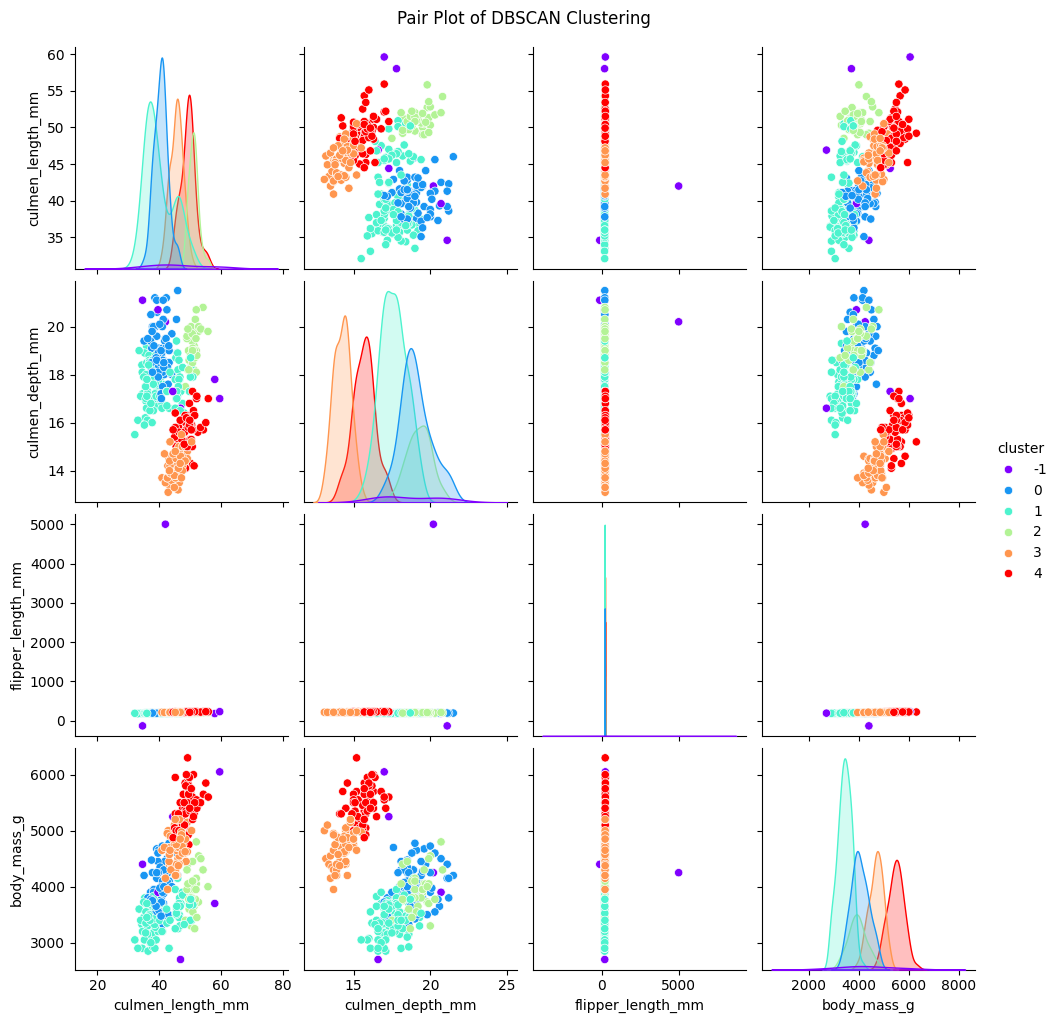

In [26]:
#Pairplot
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with numerical columns and a 'cluster' column
numerical_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Adding cluster labels to the DataFrame
df['cluster'] = dbscan.labels_

# Plotting the pair plot
sns.pairplot(df, vars=numerical_columns, hue='cluster', palette='rainbow', markers='o')

# Adjusting the plot title
plt.suptitle('Pair Plot of DBSCAN Clustering', y=1.02)

# Show the plot
plt.show()

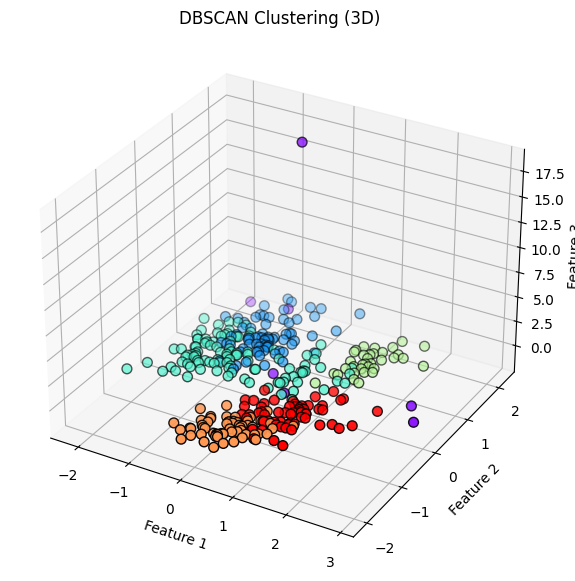

In [27]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=dbscan.labels_, cmap='rainbow', marker='o', edgecolor='k', s=50)

ax.set_title('DBSCAN Clustering (3D)')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()